## Task 3: Customer Segmentation / Clustering

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the dataset
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Merging the datasets
merged = pd.merge(transactions, customers, on='CustomerID')

In [15]:
# Feature engineering - Aggregate customer-level data
customer_data = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum', 
    'TransactionID': 'count',  
    'ProductID': 'nunique'  
}).reset_index()

In [18]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.drop(columns=['CustomerID']))

In [20]:
# K-Means clustering
num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
customer_data['Cluster'] = clusters

# Evaluating clusters
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"DB Index: {db_index}")

DB Index: 0.602513017668666


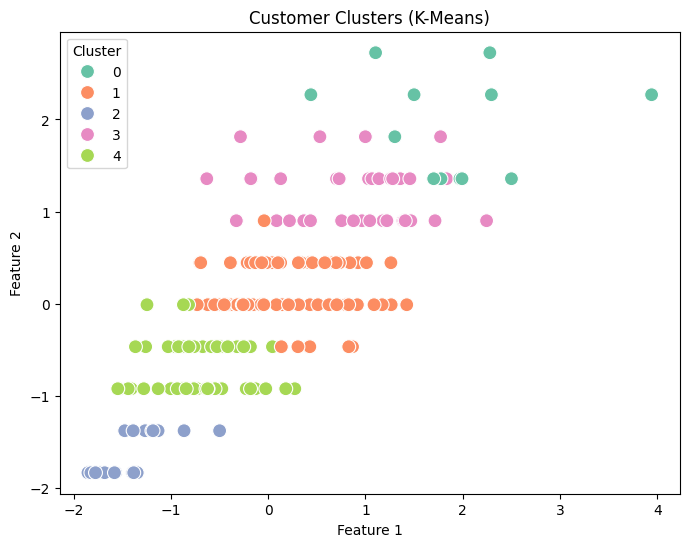

In [28]:
# Visualization - 1 (Scatter plot) - K-Means clustering of customers
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_data[:, 0], y=scaled_data[:, 1],
    hue=clusters, palette="Set2", s=100
)
plt.title("Customer Clusters (K-Means)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

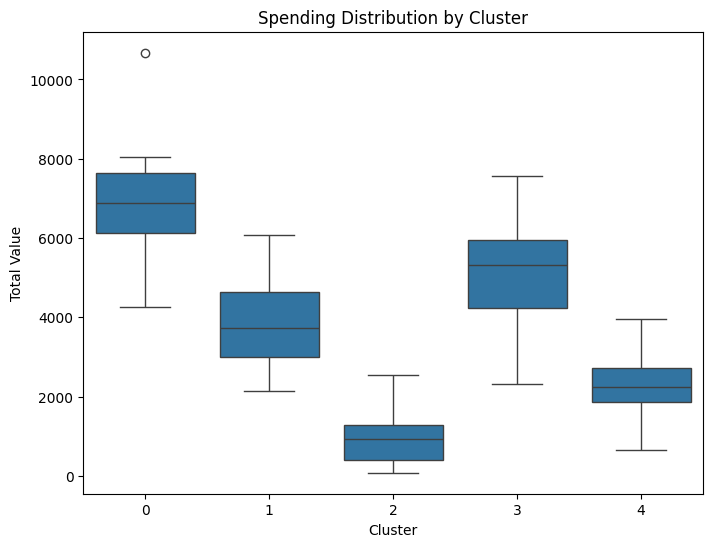

In [29]:
# Visualization - 2 (Box plot) - Spending Distribution by Cluster
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_data, x='Cluster', y='TotalValue')
plt.title("Spending Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Value")
plt.show()

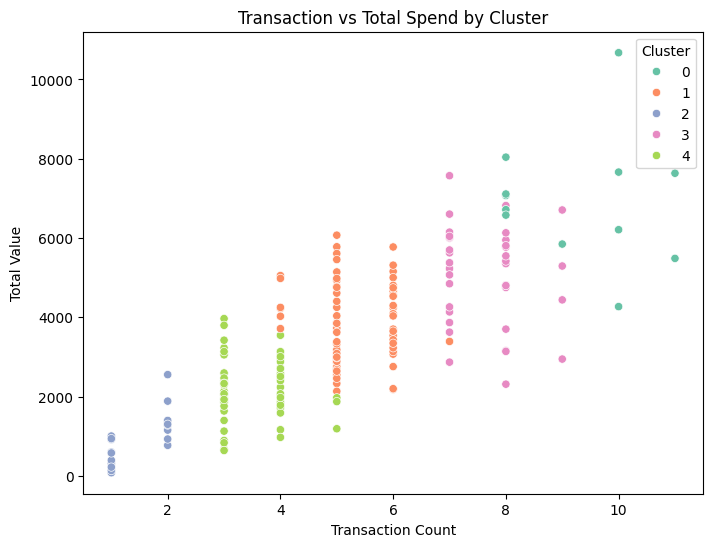

In [30]:
# Visualization - 3 (Scatter plot) - Transaction vs Total Spend by Cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data['TransactionID'], y=customer_data['TotalValue'], hue=customer_data['Cluster'], palette="Set2")
plt.title("Transaction vs Total Spend by Cluster")
plt.xlabel("Transaction Count")
plt.ylabel("Total Value")
plt.legend(title="Cluster")
plt.show()

In [31]:
print(f"Number of Clusters: {num_clusters}")
print(f"DB Index: {db_index}")
print("Cluster Summary:")
for cluster in range(num_clusters):
    cluster_size = customer_data[customer_data['Cluster'] == cluster].shape[0]
    print(f"Cluster {cluster}: {cluster_size} customers")

Number of Clusters: 5
DB Index: 0.602513017668666
Cluster Summary:
Cluster 0: 12 customers
Cluster 1: 71 customers
Cluster 2: 21 customers
Cluster 3: 36 customers
Cluster 4: 59 customers
